In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


In [2]:
from scipy.integrate import solve_ivp

In [3]:
a = -0.025794
c = 0.02
b1 = 0.0135
b2 = 0.0065
k = 0.129
sigma = 1
alpha = 0.35
eps = 1
beta = 10e-8
q=1.6

In [4]:
def FHN(self, X):
        x1, y1, x2, y2 = X
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                b1*x1 - c*y1,
                x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                b2*x2 - c*y2
               ]

In [5]:
def jac(t, X):
    x1, y1, x2, y2 = X
    jacobian = np.zeros((4, 4))
    jacobian[0][0] = -3*x1**2 + 2*a*x1 + 2*x1 - k
    jacobian[0][1] = -1
    jacobian[0][2] = k
    jacobian[1][0] = b1
    jacobian[1][1] = -c
    jacobian[2][0] = k
    jacobian[2][2] = -3*x2**2 + 2*a*x2 + 2*x2 - k
    jacobian[2][3] = -1
    jacobian[1][2] = b2
    jacobian[1][3] = -c
    return jacobian

In [18]:
def FHN1(self, X):
        x1, y1 = X
        return [x1*(a-x1)*(x1-1) - y1,
                b1*x1 - c*y1 
               ]

In [19]:
sol1 = solve_ivp(FHN1, [0, 25000], [-0.1, -0.1], 
                t_eval=np.array(range(0, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

Text(0, 0.5, 'y')

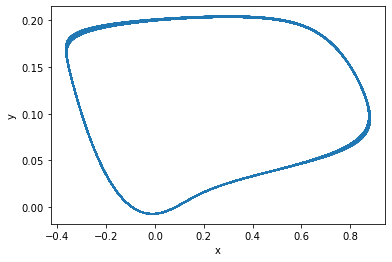

In [23]:
plt.plot(sol1.y[0][100:],sol1.y[1][100:])
plt.xlabel('x')
plt.ylabel('y')

In [6]:
sol = solve_ivp(FHN, [0, 25000], [-0.1, -0.1, -0.1, -0.1], 
                t_eval=np.array(range(0, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)
#sol = solve_ivp(FHN, [0, 10000], [0.1, 0.1, 0.1, 0.1], method='LSODA', first_step=2, max_step=2, jac=jac, 
                # min_step=1.5, dense_output=True)

Text(0, 0.5, 'x1')

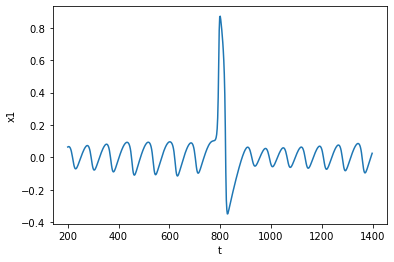

In [7]:
plt.plot(sol.t[100:700],sol.y[0][100:700])
#plt.plot([200, 1400], [mean + 6*std, mean + 6*std])
plt.xlabel('t')
plt.ylabel('x1')

In [14]:
mean = sol.y[0][100:].mean()
std = sol.y[0][100:].std()
mean + 6*std

0.709082359610381

Text(0, 0.5, 'y1')

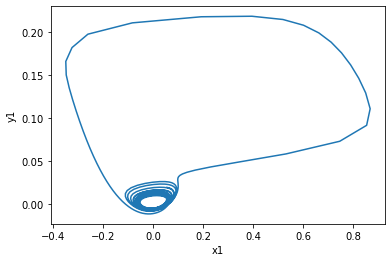

In [12]:

plt.plot(sol.y[0][100:700],sol.y[1][100:700])
plt.xlabel('x1')
plt.ylabel('y1')

Text(0, 0.5, 'x2')

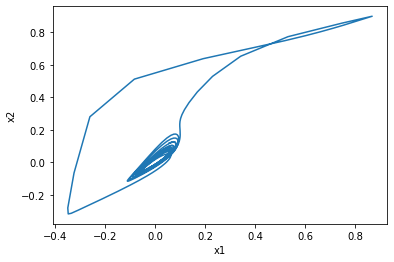

In [13]:
plt.plot(sol.y[0][100:700],sol.y[2][100:700])
plt.xlabel('x1')
plt.ylabel('x2')

In [9]:
#sol2 = solve_ivp(FHN, [2000, 25000], sol.y[:, 1000], 
 #                t_eval=np.array(range(2000, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

In [10]:
#plt.plot(sol2.t + 2000,sol2.y[0])

In [11]:
T = [21100, 21920, 23260]
G = [0]

In [12]:
def FHN_sup(t, X):
    x1, y1, x2, y2 = X
    if G[0] < len(T) and np.abs(t - T[G[0]]) < 50:
        print(t)
        G[0] += 1  
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1) - 1e-3,
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]
        
    return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]

In [13]:
sol_sup = solve_ivp(FHN_sup, [0, 25000], [-2.24, -3.31, 1.012, 5.123], 
                t_eval=np.array(range(0, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

21050.246631242655
21870.072645659304
23210.081455186933


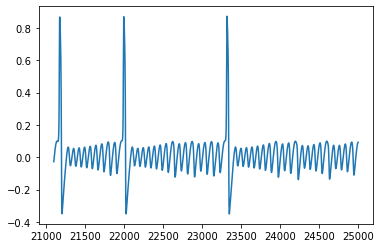

In [14]:
plt.plot(sol_sup.t[21100//2:] ,sol_sup.y[0][21100//2:])

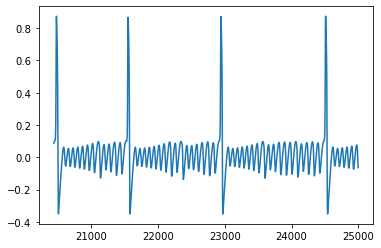

In [24]:
plt.plot(sol.t[10218:] ,sol.y[0][10218:])

In [27]:
sol.y[0][10000:10100].max()

0.0981837986467188

In [28]:
train = sol.y[0][100:10218]
test = sol.y[0][10218:] 
#test = sol2.y[0]

In [29]:
mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

In [30]:
W_in = np.random.uniform(-sigma, sigma, (1000, 1))

In [31]:
from skimage.io import imshow

In [32]:
def erdos_renyi(n=1000, p=0.6):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            if np.random.uniform(0, 1) > p:
                a = np.random.uniform(-1, 1)
                A[i][j] = a
                A[j][i] = a
                
        A[i][i] = 0
            
    return A

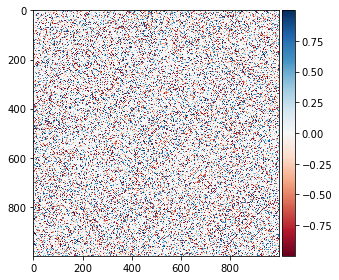

In [33]:
A = erdos_renyi()
imshow(A)

In [34]:
A = A*(1.6/np.linalg.eig(A)[0].max())

In [35]:
np.linalg.eig(A)[0].max()

1.5999999999999983

In [36]:
def reservoir(U):
    r = np.random.uniform(1, -1, (1000, 1))
    R = np.zeros((1000, len(U)))
    R[:, 0] = r[:, 0]
    for i in range(1, len(U)):
        r = (1-alpha)*r + np.tanh(A@r + W_in*U[i] + eps) #U[i] is a number
        R[:, i] = r[:, 0]
    return R

In [37]:
#R = reservoir(train)
R = reservoir(train_norm)

In [38]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=beta)
#reg.fit(R.T, train)
reg.fit(R.T[1000:], train_norm[1000:])

Ridge(alpha=1e-07)

In [39]:
def reservoir_step(r, v):
    return (1-alpha)*r + np.tanh(A@r + W_in*v + eps)

In [40]:
r = np.expand_dims(R[:, -1], axis=1)
def predict(r, v):
    r = reservoir_step(r, v)
    v_new = reg.predict(r.reshape((1, 1000)))
    return r, v_new

In [41]:
from IPython.display import clear_output


In [47]:
v = test_norm[0]
predicted = []
rms = []
r = np.expand_dims(R[:, -1], axis=1)
#r = reservoir_step(r, train[-1])
r = reservoir_step(r, train_norm[-1])
for i in range(20):
    r, v = predict(r, v)            
           
    predicted.append(mean + v*std)

In [45]:
test_norm[0]

0.612565930008008

In [46]:
train_norm[-1]

0.5742854736331545

In [48]:
predicted

[array([0.08768079]),
 array([0.08809376]),
 array([0.0880312]),
 array([0.08755878]),
 array([0.0867458]),
 array([0.08565863]),
 array([0.0843567]),
 array([0.08289043]),
 array([0.08130017]),
 array([0.07961558]),
 array([0.07785504]),
 array([0.07602481]),
 array([0.07411816]),
 array([0.07211424]),
 array([0.06997701]),
 array([0.06765432]),
 array([0.06507722]),
 array([0.06215969]),
 array([0.05879901]),
 array([0.05487688])]

In [30]:
# all_rms = []
# for M in [10, 20, 25, 30]:
#     v = test[0]
#     predicted = []
#     rms = []
#     r = np.expand_dims(R[:, -1], axis=1)
#     for i in range(len(test)):
#         if i%M == 0 and i != 0:
#             rms.append((v-test[i])**2)
#             v = test[i]        
#         r, v = predict(r, v)
#         predicted.append(v)
#     all_rms.append(np.mean(rms)**0.5)

In [31]:
#all_rms

In [32]:
#plt.plot([10, 20, 25, 30], all_rms)

In [33]:
#np.mean(rms)**0.5

In [33]:
v = test[0]
predicted = []
rms = []
r = np.expand_dims(R[:, -1], axis=1)
#r = reservoir_step(r, train[-1])
r = reservoir_step(r, train_norm[-1])
for i in range(len(test)):
    if 980 < i < 1100:
        v = test_norm[i] 
        predicted.append(mean + v*std)
        r, v = predict(r, v) 
    else:
        if i %10 == 0 and (i < 950 or i >=1100) and i <= 1930:
            v = test_norm[i] 
            predicted.append(mean + v*std)
            r, v = predict(r, v) 
        else:
        #if mean + v*sigmastest[i] < -800.2:
            
            r, v = predict(r, v)
                    #print(i%10, i, v, sigmastr[i])
            predicted.append(mean + v[0]*std)
        

In [26]:
predicted = []
predicted_ee_all = []
M = 20
r = np.expand_dims(R[:, -1], axis=1)
#r = reservoir_step(r, train[-1])
r = reservoir_step(r, train_norm[-1])
for i in range(len(test)):
    r_loop = r
    flag_ee = 0
    v = test_norm[i] 
    predicted_ee = []
    for m in range(M): 
        r_loop, v = predict(r_loop, v)
        predicted_ee.append(((mean + v[0]*std), i))
        if mean + v[0]*std > 0.2:
            flag_ee = 1
        if m == M - 1 and flag_ee == 1:
            predicted_ee_all.append(predicted_ee)
    v = test_norm[i] 
    r = reservoir_step(r, v)
    predicted.append(mean + v*std)
        
        

In [27]:
predicted_ee_all

[[(-0.031834272570915007, 17),
  (-0.01399116948052651, 17),
  (0.002708920924209851, 17),
  (0.0183240123492523, 17),
  (0.03288537302531519, 17),
  (0.04644824288606074, 17),
  (0.05909104100811222, 17),
  (0.07090276090238755, 17),
  (0.08198911291270479, 17),
  (0.09250449122540748, 17),
  (0.10268642296363696, 17),
  (0.11286175184456174, 17),
  (0.12342452355905832, 17),
  (0.1348244267149461, 17),
  (0.14760877526782737, 17),
  (0.16251689501146166, 17),
  (0.18053691748862538, 17),
  (0.20266576470960554, 17),
  (0.22876400400571317, 17),
  (0.25472100888701155, 17)],
 [(-0.021446004405283853, 18),
  (-0.003712379486563751, 18),
  (0.012961802869882216, 18),
  (0.02862169840516731, 18),
  (0.04331543235722234, 18),
  (0.05711735984392392, 18),
  (0.07011790873432171, 18),
  (0.08242313109822072, 18),
  (0.09418627731419589, 18),
  (0.1056547990441071, 18),
  (0.1171898493630737, 18),
  (0.12924343111489647, 18),
  (0.14233757884010137, 18),
  (0.15710497626333203, 18),
  (0.174

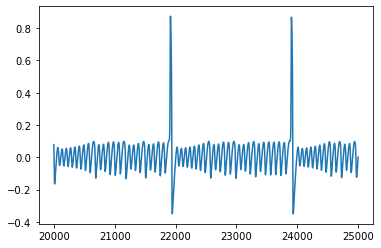

In [28]:
plt.plot(sol.t[10000:],test)

Попробовать предсказывать только на 20 шагов вперед, но резервуар обновлять по u

In [37]:
v = test[0]
predicted = []
rms = []
r = np.expand_dims(R[:, -1], axis=1)
#r = reservoir_step(r, train[-1])
r = reservoir_step(r, train_norm[-1])
for i in range(len(test)):
    if  i <= 940:
        v = test_norm[i] 
        predicted.append(mean + v*std)
        r, v = predict(r, v) 
    else:
        #if mean + v*sigmastest[i] < -800.2:
        r, v = predict(r, v)
                    #print(i%10, i, v, sigmastr[i])
        predicted.append(mean + v[0]*std)

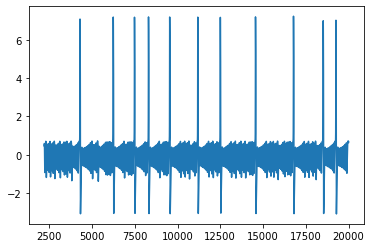

In [30]:
plt.plot(sol.t[1100:10000], reg.predict(R.T[1000:]))

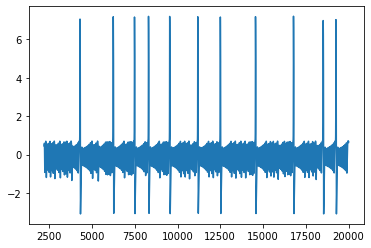

In [31]:
plt.plot(sol.t[1100:10000], train_norm[1000:])

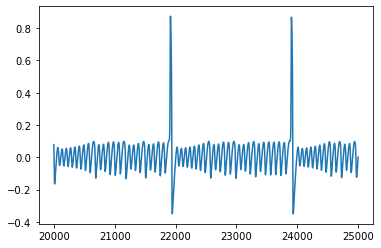

In [36]:
plt.plot(sol.t[10000:],test)
#plt.plot(sol2.t,test)

In [41]:
test[956]

0.7036032418892433

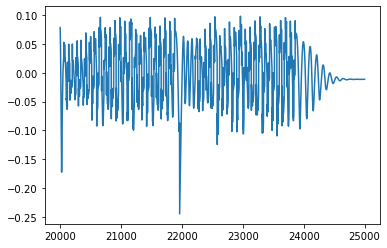

In [35]:
plt.plot(sol.t[10000:],predicted[:])
#plt.plot(sol2.t,predicted)

In [43]:
#plt.plot(sol.t[10000:], predicted)
#plt.plot(sol.t[10000:], test)

In [132]:
def FHN_correcting(t, X):    
        x1, y1, x2, y2 = X
        #if t == t_global or (-t + (np.array(T_events) - 50) < 1e-4).sum() > 0:
        if t == t_global-40:
            print(t)
            
            return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1) - 1,
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]
        
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]

In [133]:
t_global = sol.t[10000:][950]

In [134]:
smth = solve_ivp(FHN_correcting, [sol.t[10000:][950]-40, 25000], sol.y[:, 10000:][:, 950], 
                             t_eval=np.array(range(sol.t[10000:][950], 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True)

21860.0


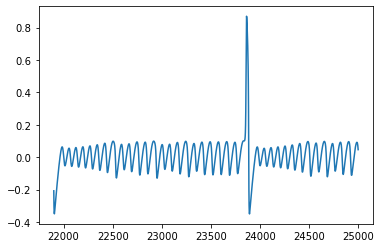

In [135]:
plt.plot(smth.t, smth.y[0])

In [ ]:
C = 0 
 
def FHN_correcting(t, X):    
        x1, y1, x2, y2 = X
        if (-t + (np.array(T_events) - 50) < 1e-4).sum() > 0:
        #if t == t_global-40:
            print(t)
            
            return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1) - 1,
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]
        
        return [x1*(a-x1)*(x1-1) - y1 + k*(x2-x1),
                    b1*x1 - c*y1,
                    x2*(a-x2)*(x2-1) - y2 + k*(x1-x2),
                    b2*x2 - c*y2
                   ]

In [136]:
T_events = []
i = 0
while i < len(test):
  if test[i] > 0.4:
    T_events.append(sol.t[10000:][i])
    i += 30
  i += 1

In [137]:
T_events

[21910, 23896]

In [ ]:
sol.t[10000:][940:970],test[940:970]

In [102]:
v = test[0]
new_data = sol.y[:, 10000:]
new_data_without_sup = sol.y[:, 10000:]
valid = []
predicted = []
rms = []
r = np.expand_dims(R[:, -1], axis=1)
r = reservoir_step(r, train_norm[-1])
t_global = 10002
M = 20
i = 0 
while i < len(new_data[0]):
    #if i%20 == 0 and i != 0:
        #rms.append((v-test[i])**2)
        #v = new_data[0, i] 
    r_loop = r
    v = (new_data[0][i] - mean)/std
    for m in range(M): 
        r_loop, v = predict(r_loop, v)
        if mean + v[0]*std > 0.2:
            print(m)
            new_data = solve_ivp(FHN_correcting, [t_global-40, 25000], new_data[:, i], 
                             t_eval=np.array(range(t_global, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True).y
            new_data_without_sup = solve_ivp(FHN, [t_global-40, 25000], new_data_without_sup[:, i], 
                                          t_eval=np.array(range(t_global, 25000, 2)), rtol = 1e-11, atol = 1e-11, dense_output=True).y
            v = (new_data[0][0] - mean)/std
            i = 0
            break
    
    v = (new_data[0][i] - mean)/std 
    r = reservoir_step(r, v)
    predicted.append(mean + v*std)
    
    #r, v = predict(r, v)
    valid.append(new_data_without_sup[0][i])
    t_global += 2
    i += 1

18
0
3
1
17
6
19
0
3


KeyboardInterrupt: 

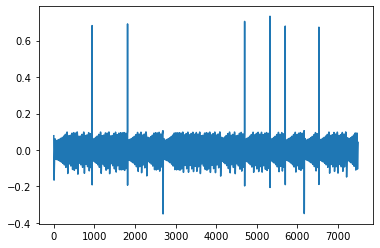

In [98]:
plt.plot(predicted)

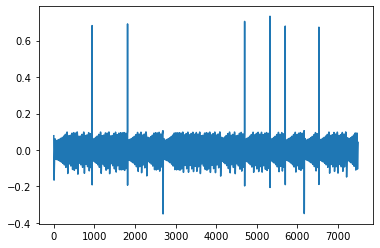

In [99]:
plt.plot(valid)

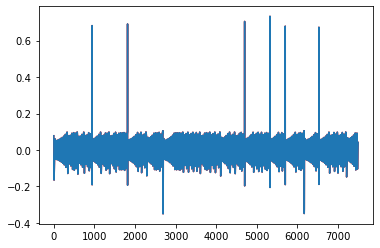

In [100]:
plt.plot( valid, c='r')
plt.plot( predicted)